# OWLSentimentAnalysis - Sentiment

## Declare Environments

In [2]:
class Environment:
    pass
env = Environment()

env.data_dir = 'data'
env.logo_dir = 'logos'
env.team_list = [
    "Atlanta Reign", "Boston Uprising", "Florida Mayhem", "Houston Outlaws",
    "London Spitfire", "NYXL", "Paris Eternal", "Philadelphia Fusion",
    "Toronto Defiant", "Washington Justice", "Chengdu Hunters", "Dallas Fuel",
    "Guangzhou Charge", "Hangzhou Spark", "Los Angeles Gladiators",
    "Los Angeles Valiant", "SFShock", "Seoul Dynasty", "Shanghai Dragons",
    "Vancouver Titans"
]

## Useful functions

In [3]:
import os
def generate_team_file_path(team_list, team_data_dir):
    teams_path_dict = {}
    for root, dirs, files in os.walk(team_data_dir):
        teams_path_dict.update({
            team_name: [
                os.path.join(team_data_dir, file) for file in files
                if file.startswith(team_name)
            ]
            for team_name in team_list
        })
    return teams_path_dict

import json
def get_data_by_team_name(team_name, team_file_paths):
    team_tweet_list = []
    for file_path in team_file_paths[team_name]:
        with open(file_path, 'r') as f:
            json_lines = [line.strip('\n') for line in f]
            json_dicts=[json.loads(json_line) for json_line in json_lines]
            team_tweet_list.extend(json_dicts)
    return team_tweet_list

env.team_file_paths = generate_team_file_path(
    team_list=env.team_list, team_data_dir=env.data_dir)


## Get sentiment from tweet

In [7]:
from textblob import TextBlob
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

get_sentiment_polarity('Today is a good day.')

0.7

### get (date, sentiment) combination

In [13]:
import datetime
def get_combination(tweet_json):
    date=datetime.datetime.strptime(tweet_json['date'], "%a %b %d %H:%M:%S %z %Y")
    polarity = get_sentiment_polarity(tweet_json['text'])
    return (date,polarity)

def get_combination_by_team_name(team_name, team_file_paths):
    t_list = get_data_by_team_name(team_name, team_file_paths)
    comb_list = [get_combination(t) for t in t_list]
    return comb_list

get_combination_by_team_name('Vancouver Titans',env.team_file_paths)

[(datetime.datetime(2019, 2, 18, 17, 26, 30, tzinfo=datetime.timezone.utc),
  0.0),
 (datetime.datetime(2019, 2, 18, 17, 16, 28, tzinfo=datetime.timezone.utc),
  0.04464285714285715),
 (datetime.datetime(2019, 2, 18, 17, 15, 32, tzinfo=datetime.timezone.utc),
  0.0),
 (datetime.datetime(2019, 2, 18, 17, 15, 15, tzinfo=datetime.timezone.utc),
  0.0),
 (datetime.datetime(2019, 2, 18, 17, 9, 35, tzinfo=datetime.timezone.utc),
  0.625),
 (datetime.datetime(2019, 2, 18, 17, 4, 5, tzinfo=datetime.timezone.utc), 0.0),
 (datetime.datetime(2019, 2, 18, 16, 45, 26, tzinfo=datetime.timezone.utc),
  0.0),
 (datetime.datetime(2019, 2, 18, 16, 43, 29, tzinfo=datetime.timezone.utc),
  0.0),
 (datetime.datetime(2019, 2, 18, 16, 43, 28, tzinfo=datetime.timezone.utc),
  0.5),
 (datetime.datetime(2019, 2, 18, 16, 32, 14, tzinfo=datetime.timezone.utc),
  0.0),
 (datetime.datetime(2019, 2, 18, 16, 25, 13, tzinfo=datetime.timezone.utc),
  0.3666666666666667),
 (datetime.datetime(2019, 2, 18, 16, 24, 53, tzi

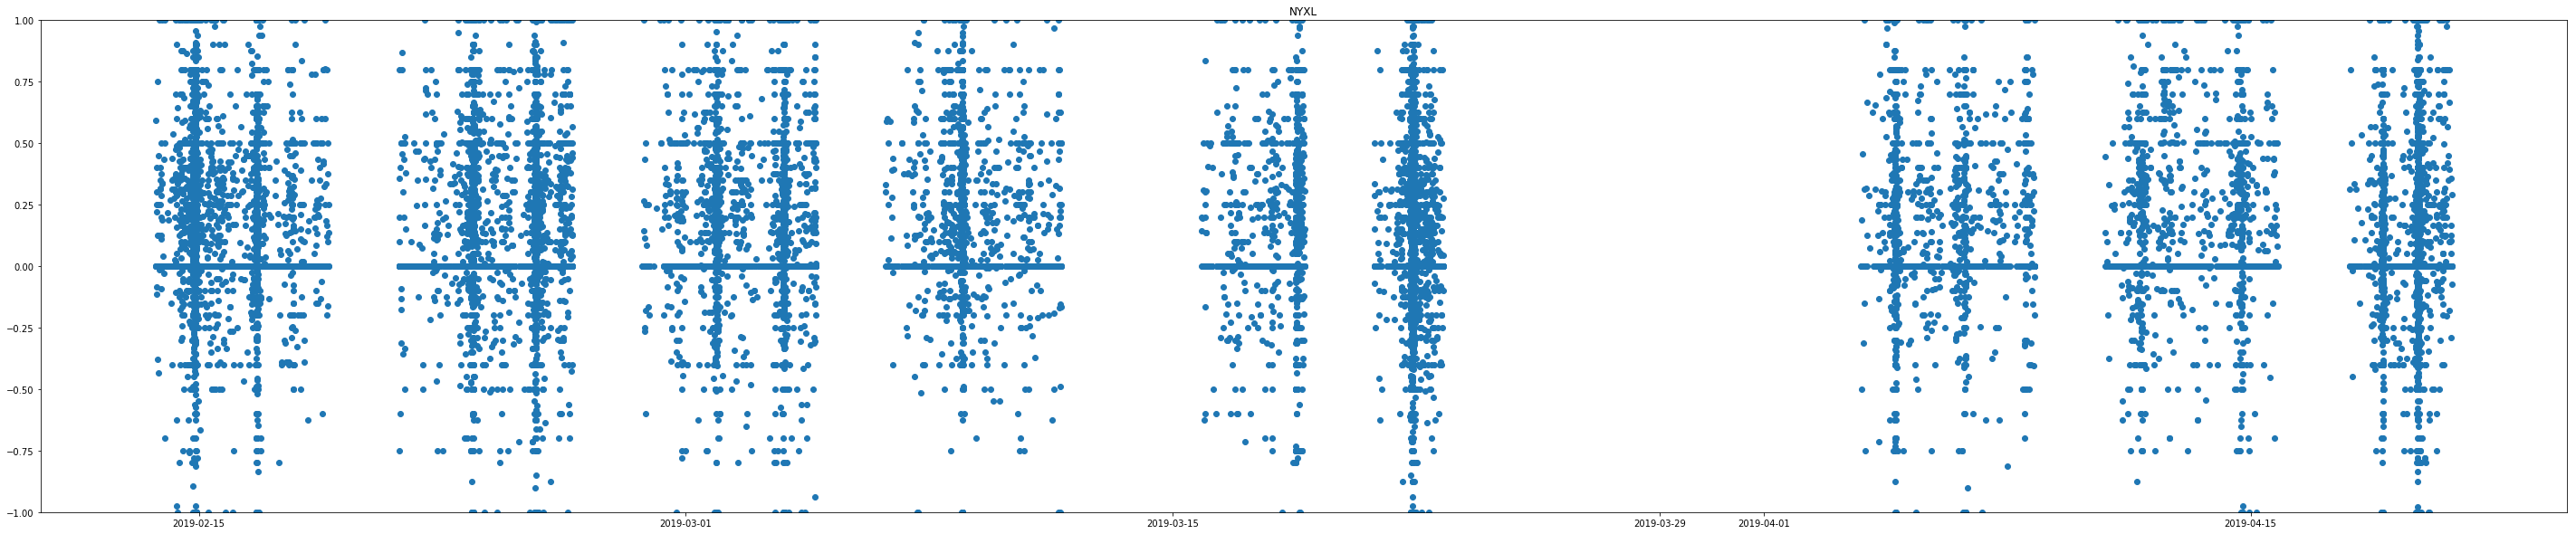

In [27]:
import matplotlib.pyplot as plt
def plot_sentiment(team_name,team_file_paths):
    s=get_combination_by_team_name(team_name,team_file_paths)
    x,y = zip(*s)
    plt.figure(figsize=[50,10])
    plt.scatter(x,y)
    plt.ylim(-1, 1)
    plt.title(team_name)
    plt.show()
    
plot_sentiment("NYXL",env.team_file_paths)

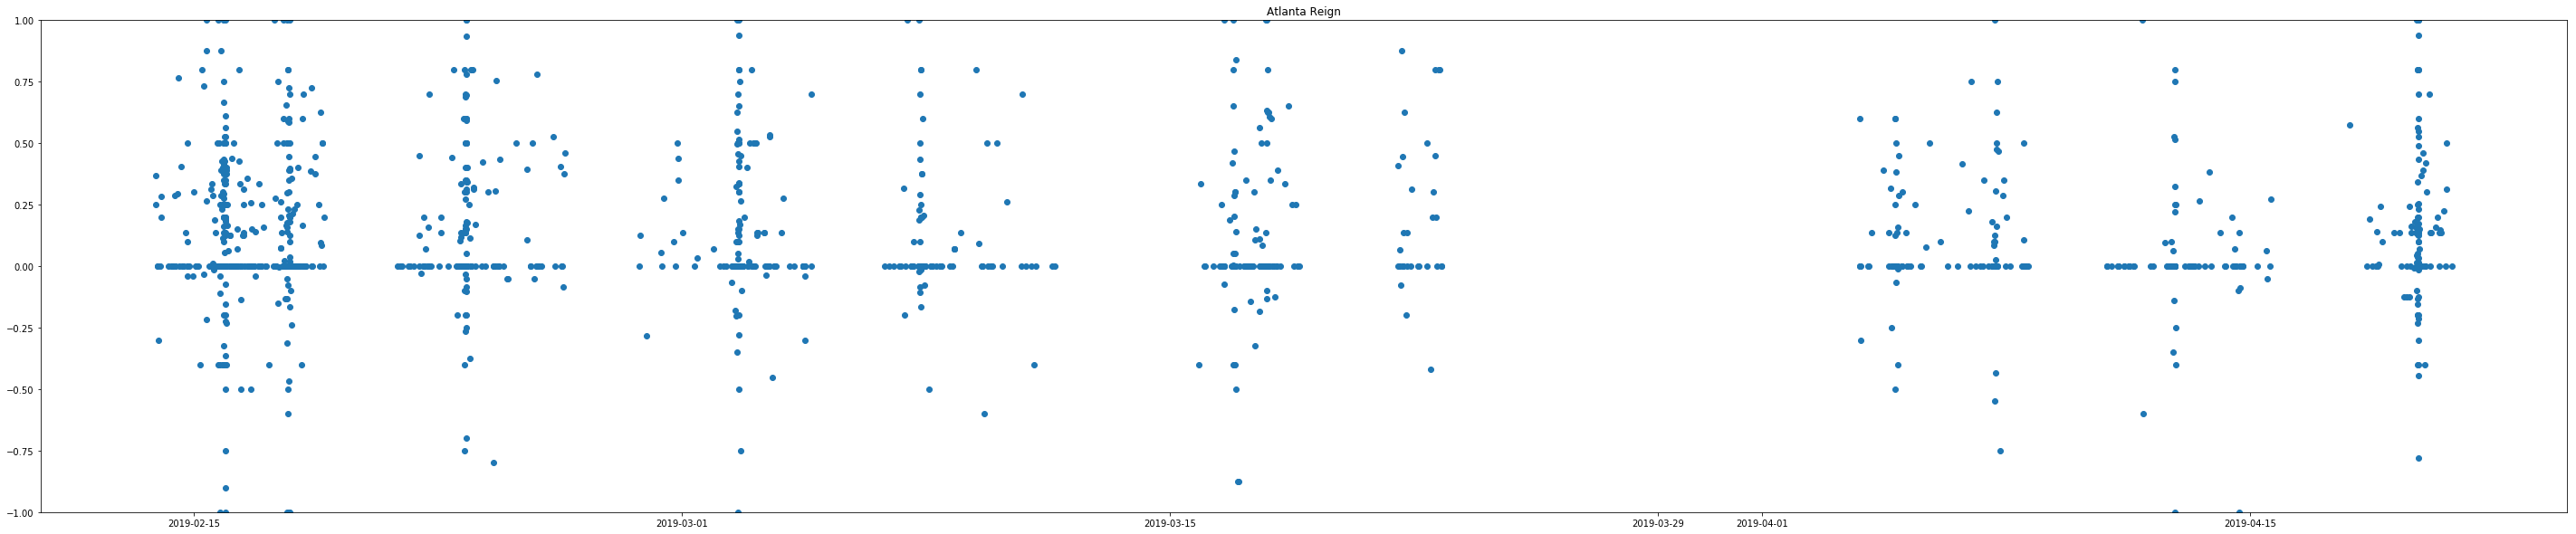

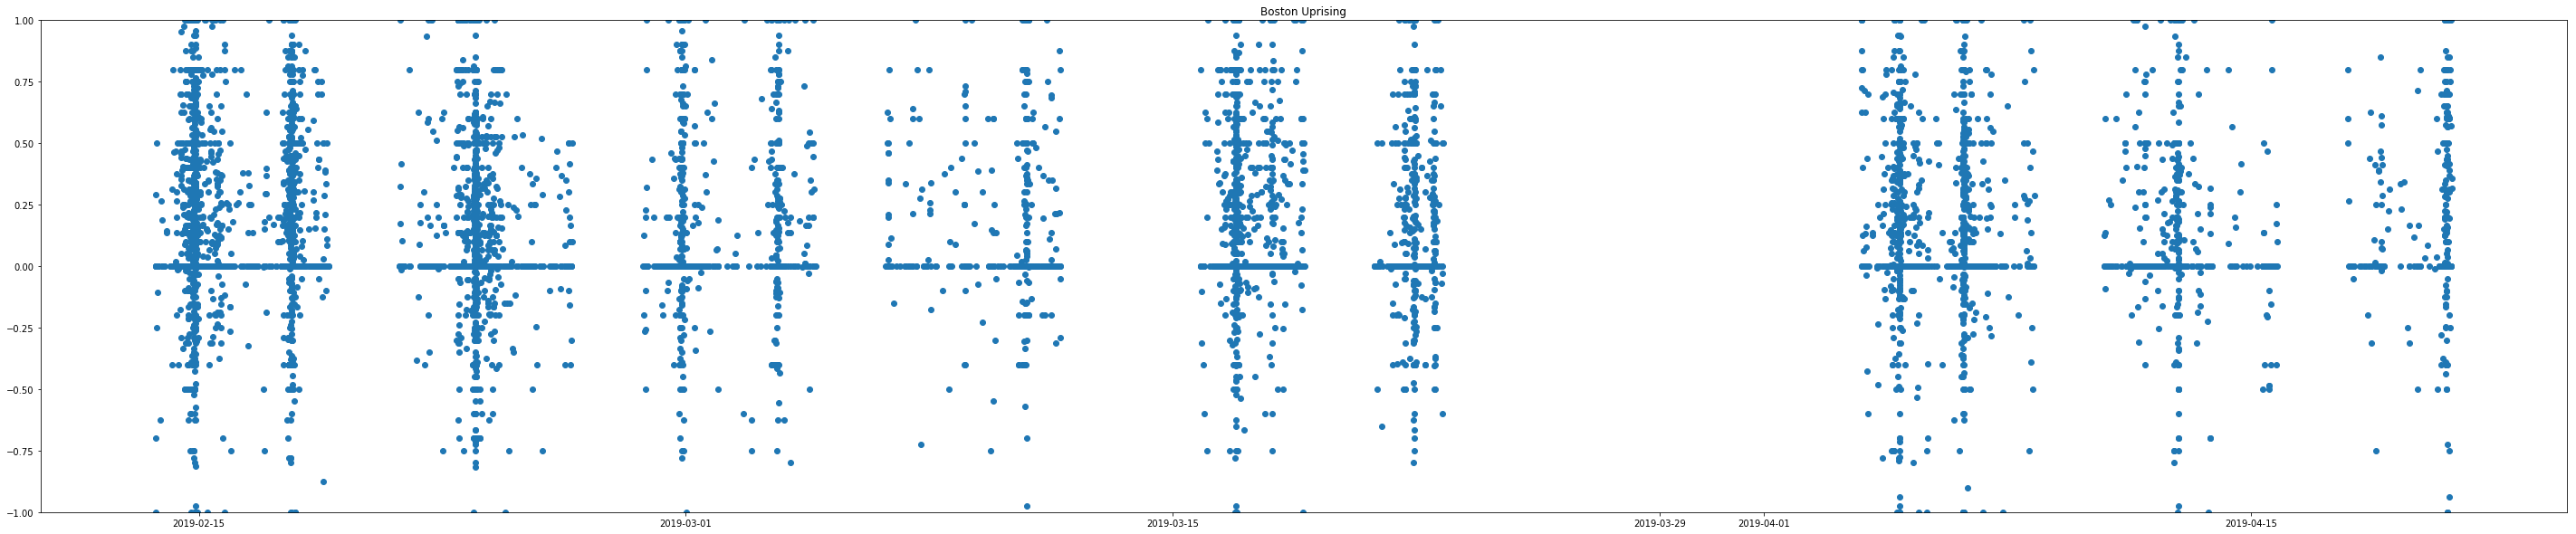

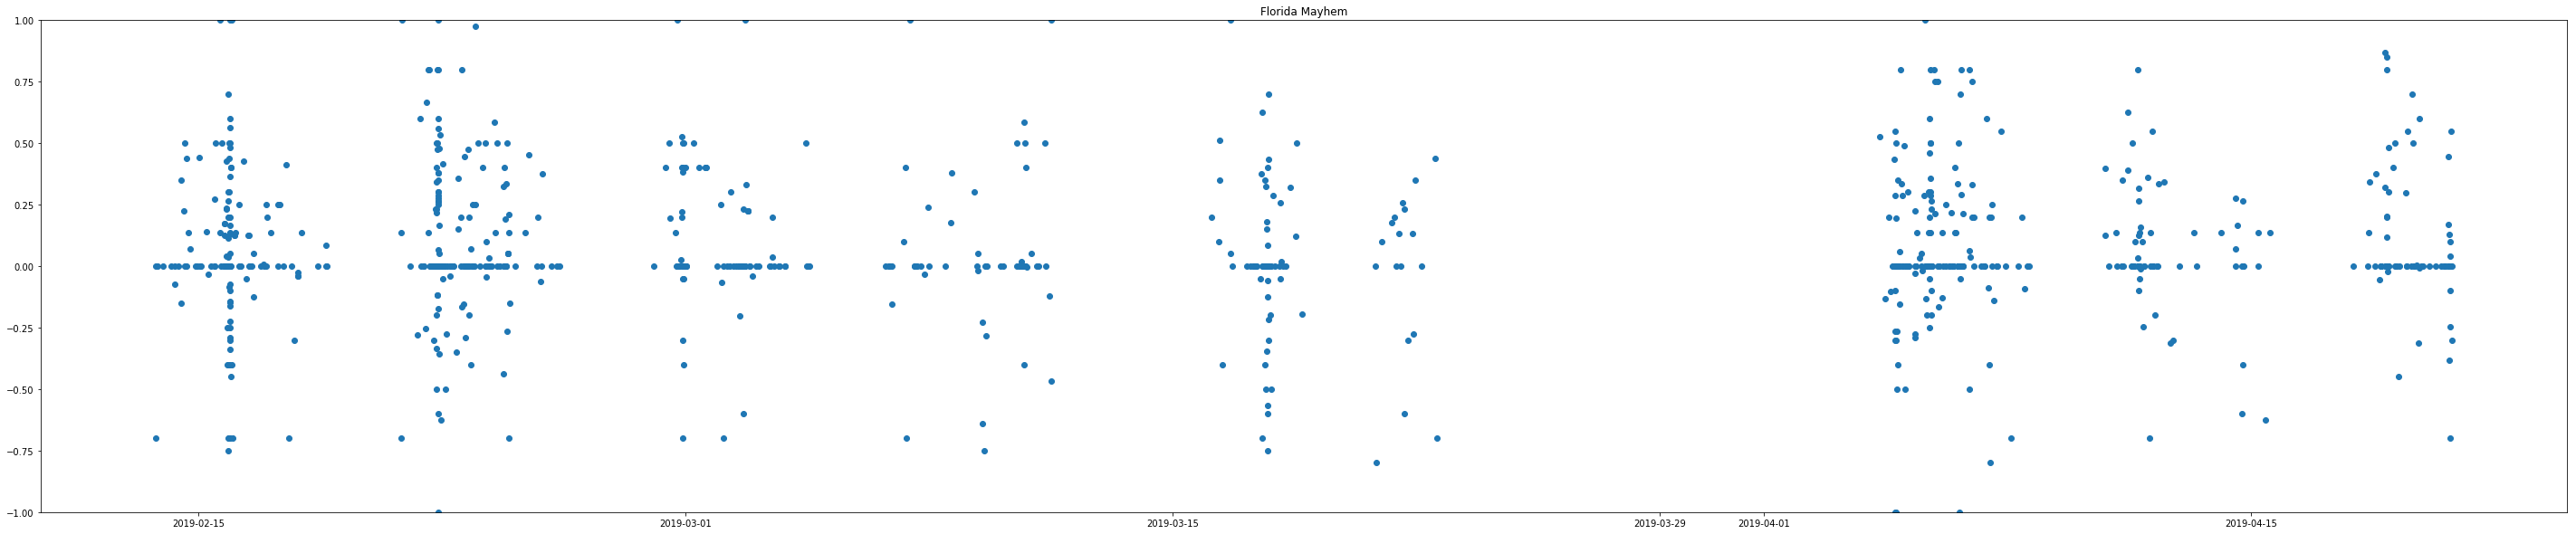

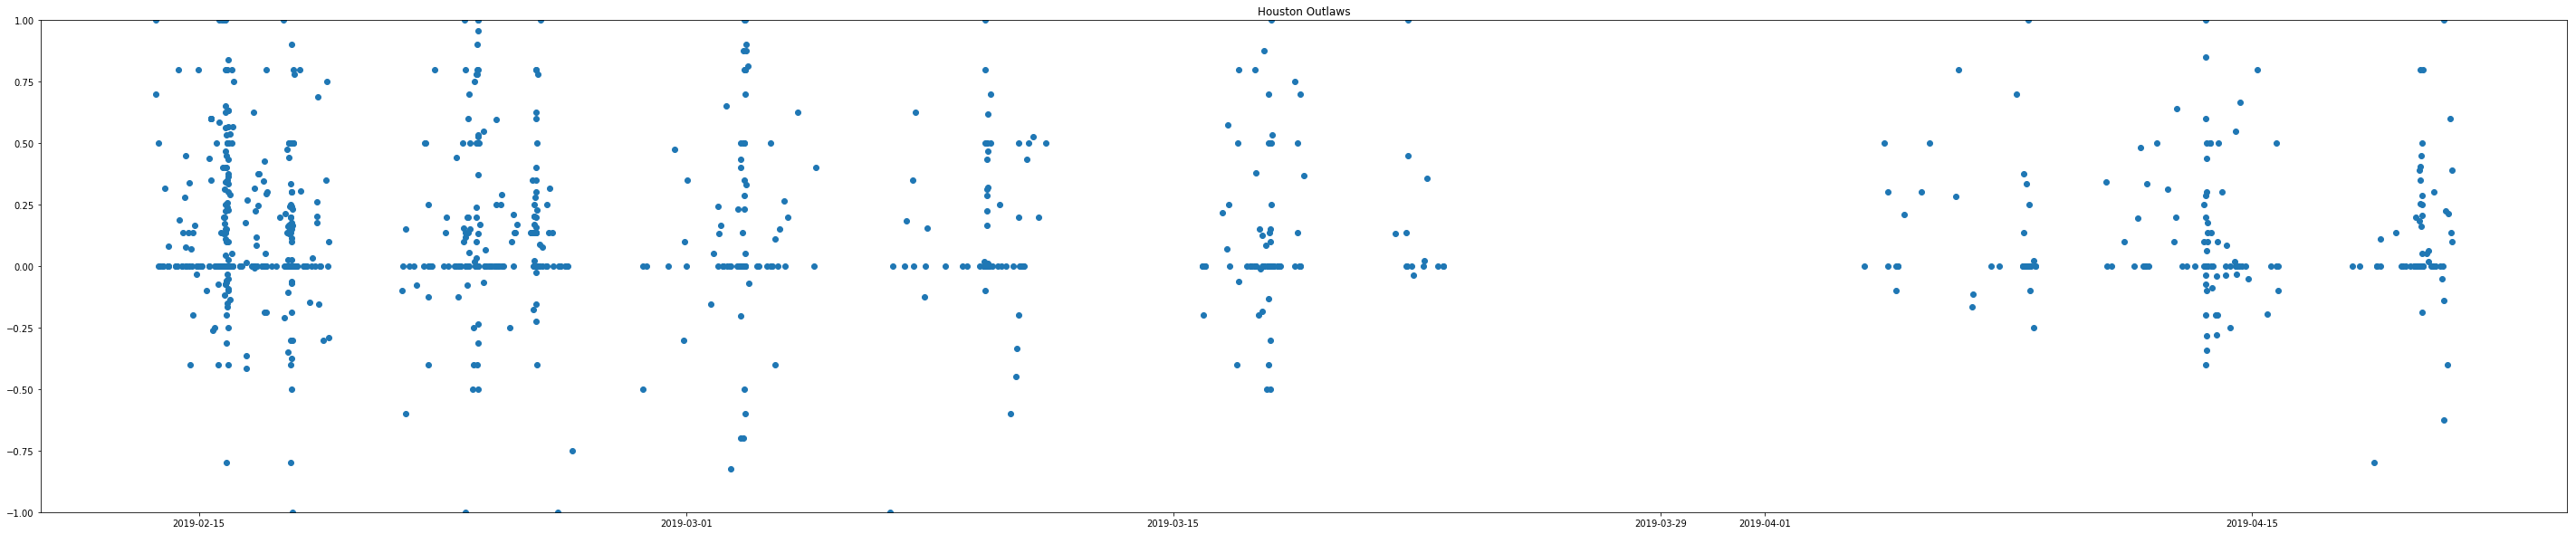

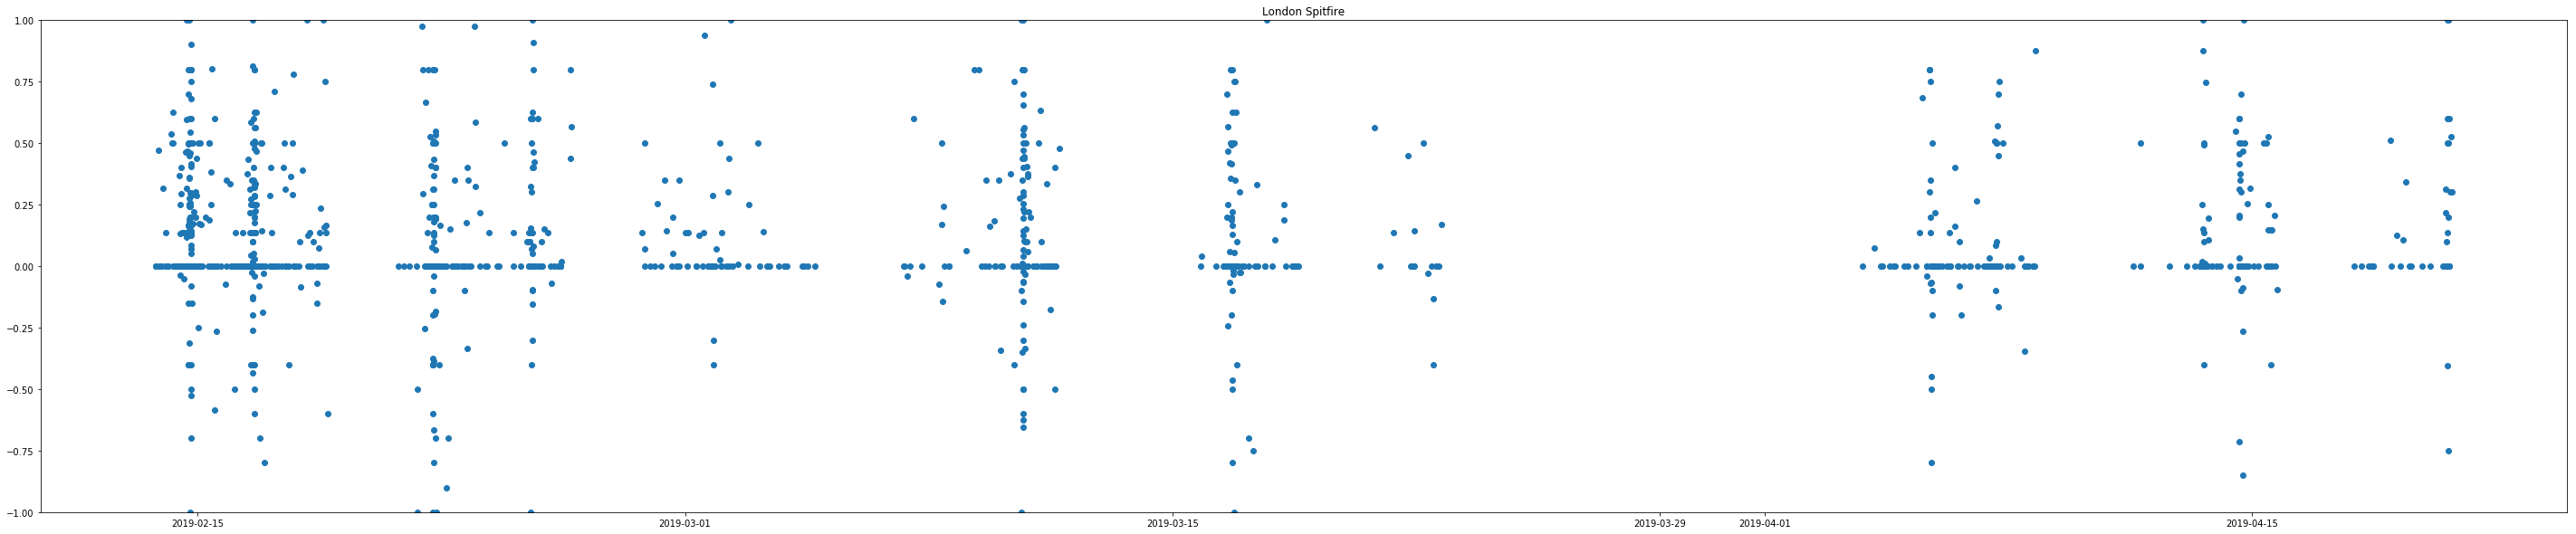

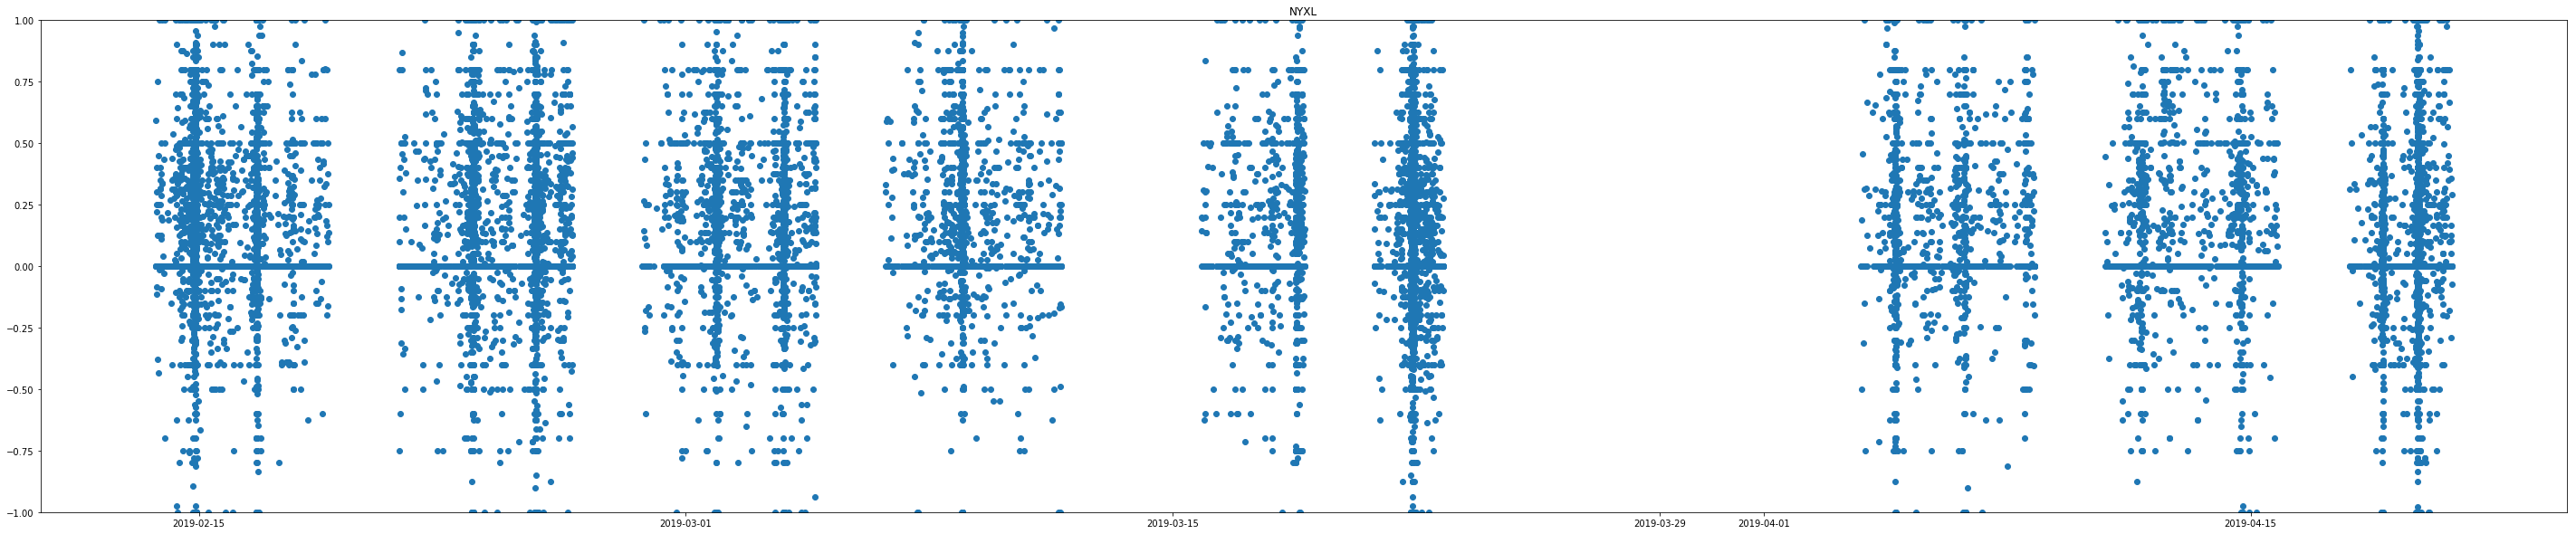

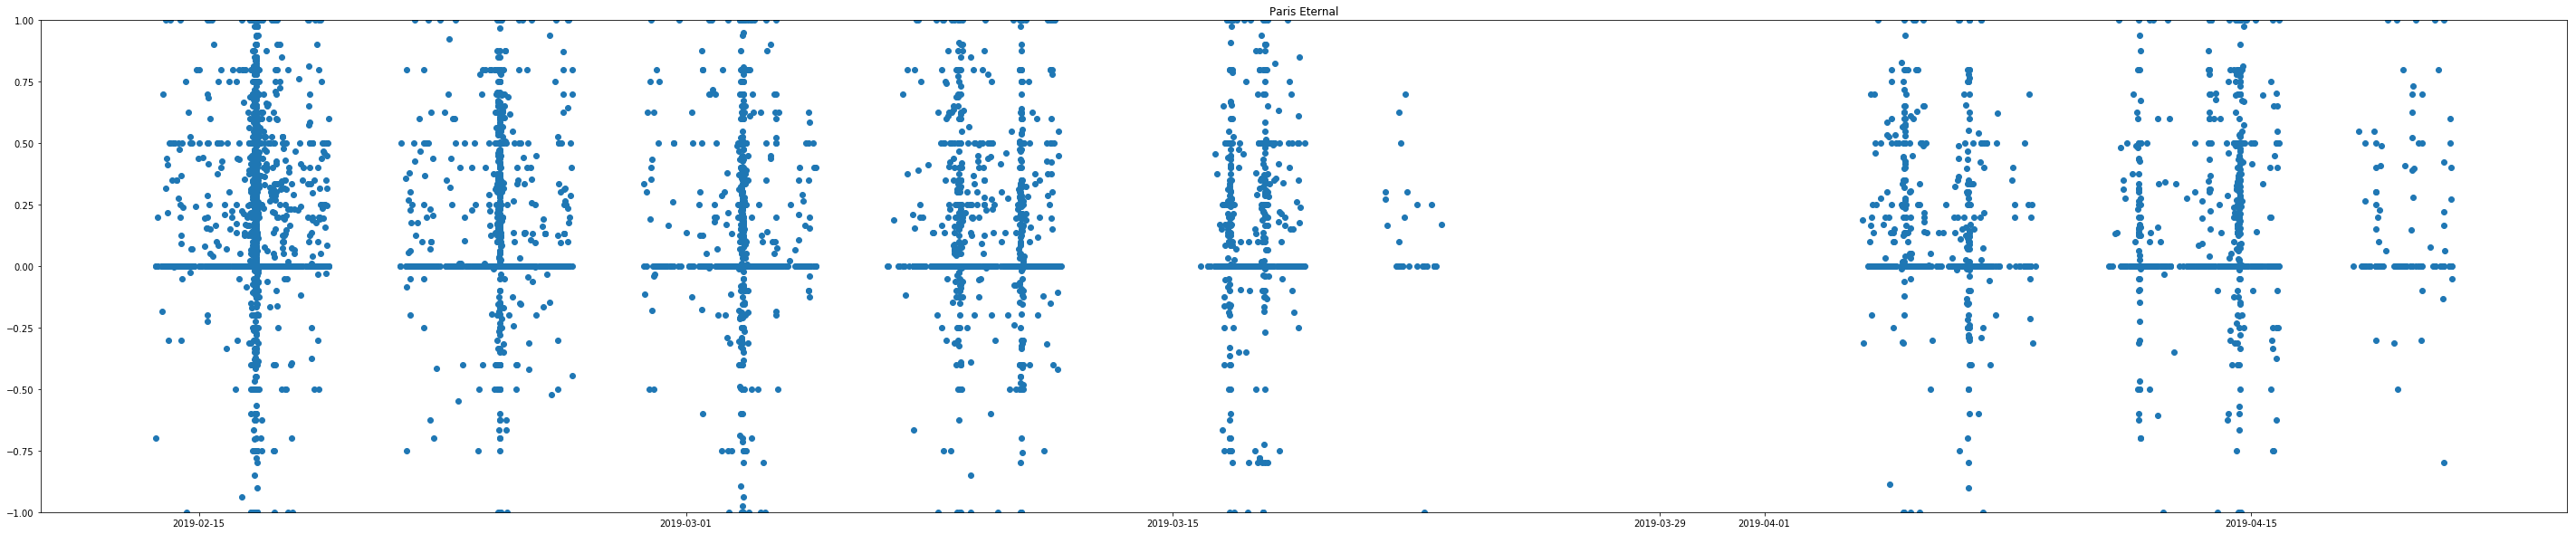

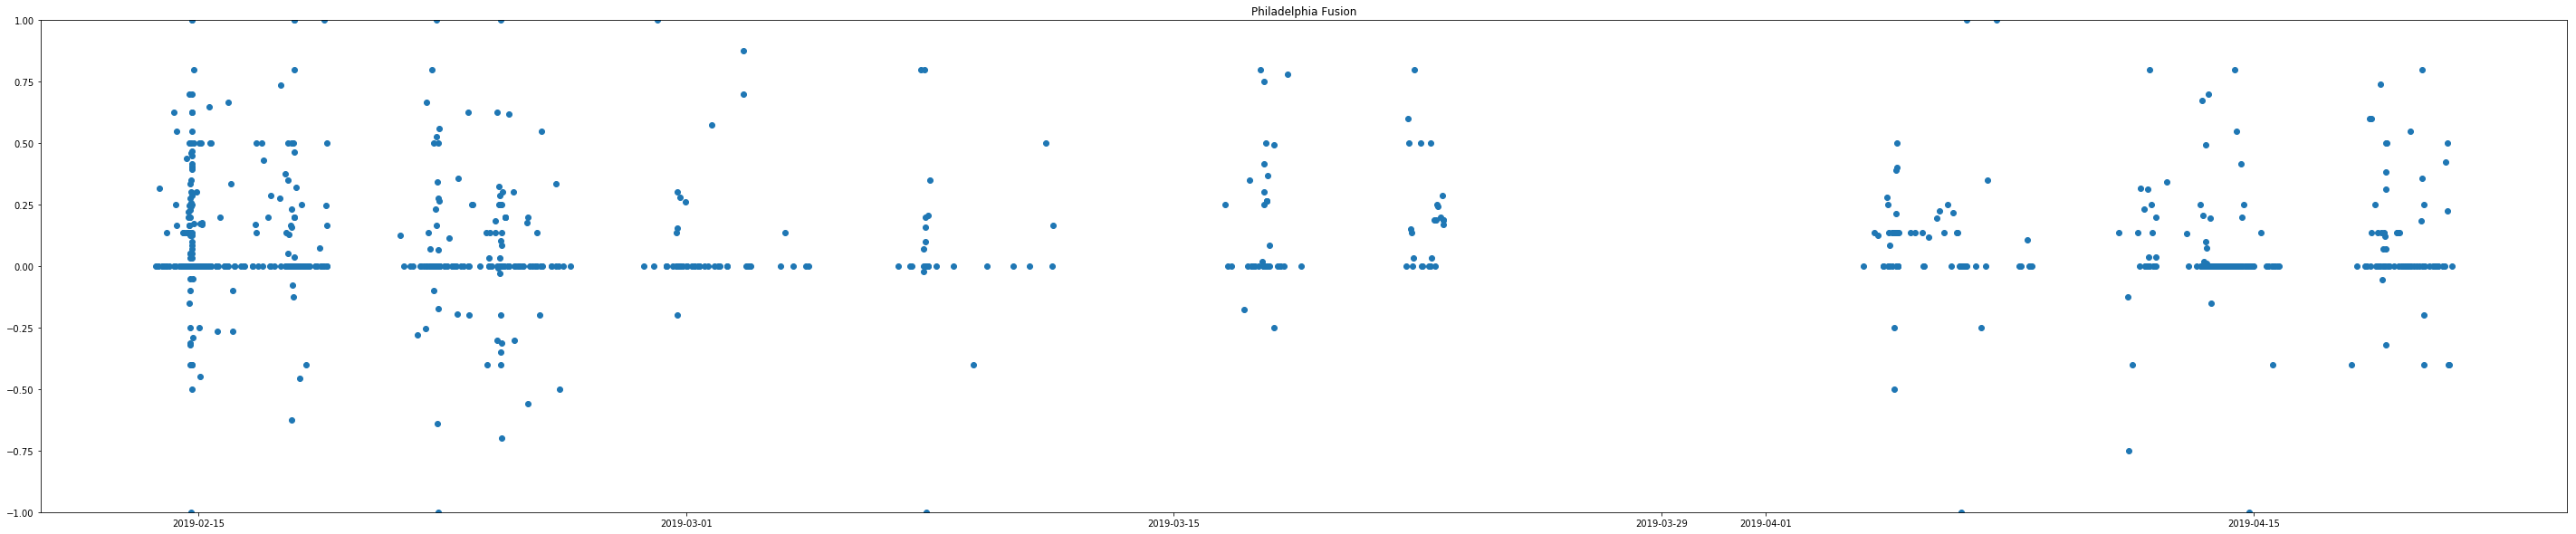

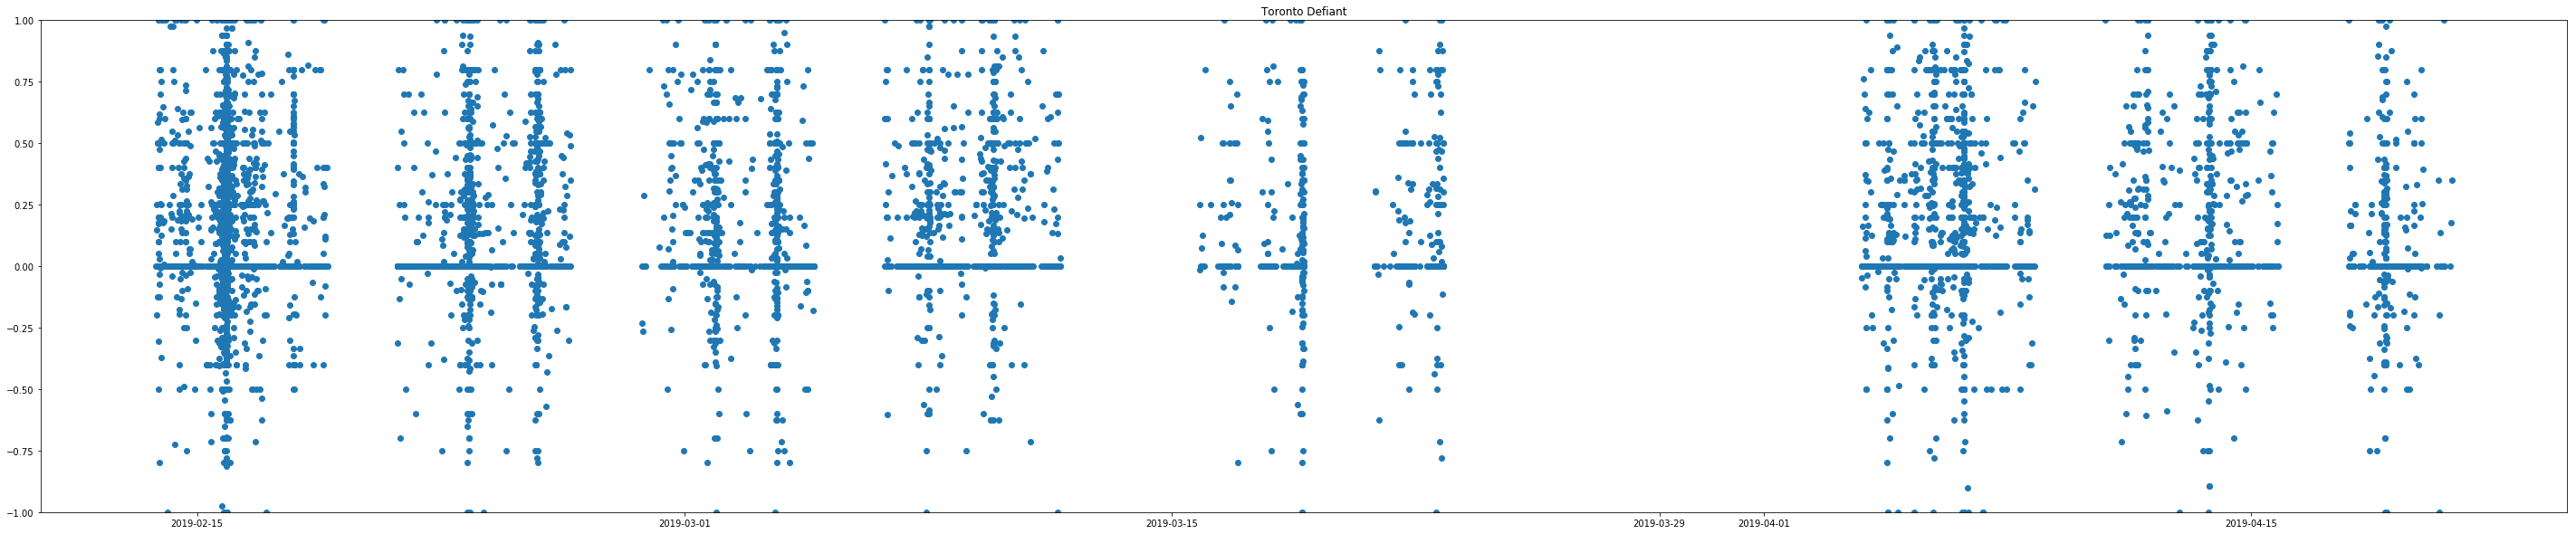

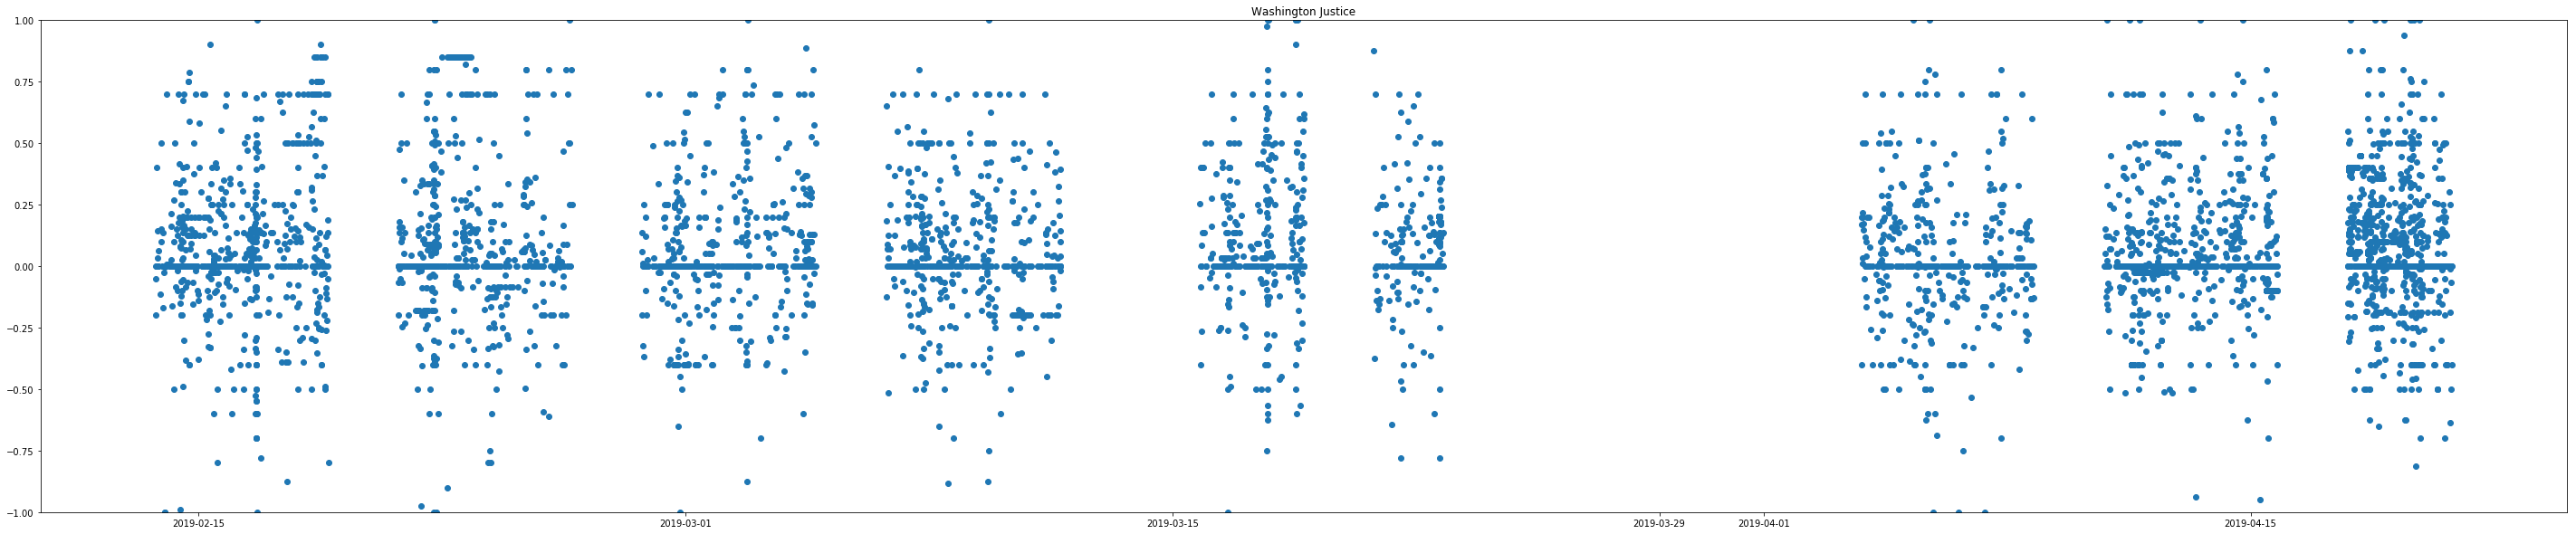

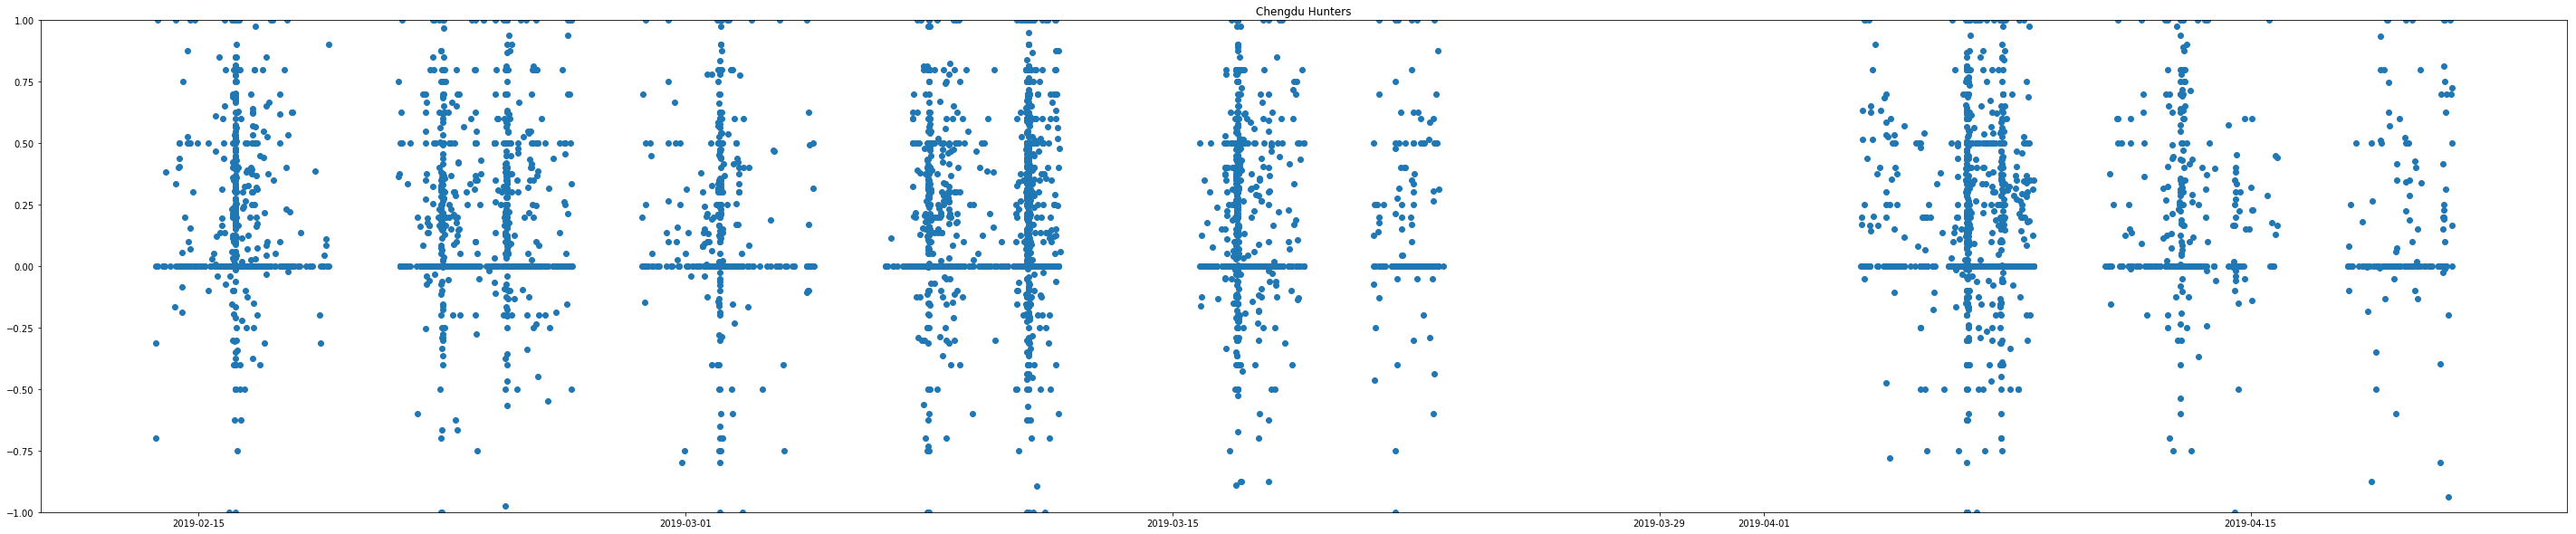

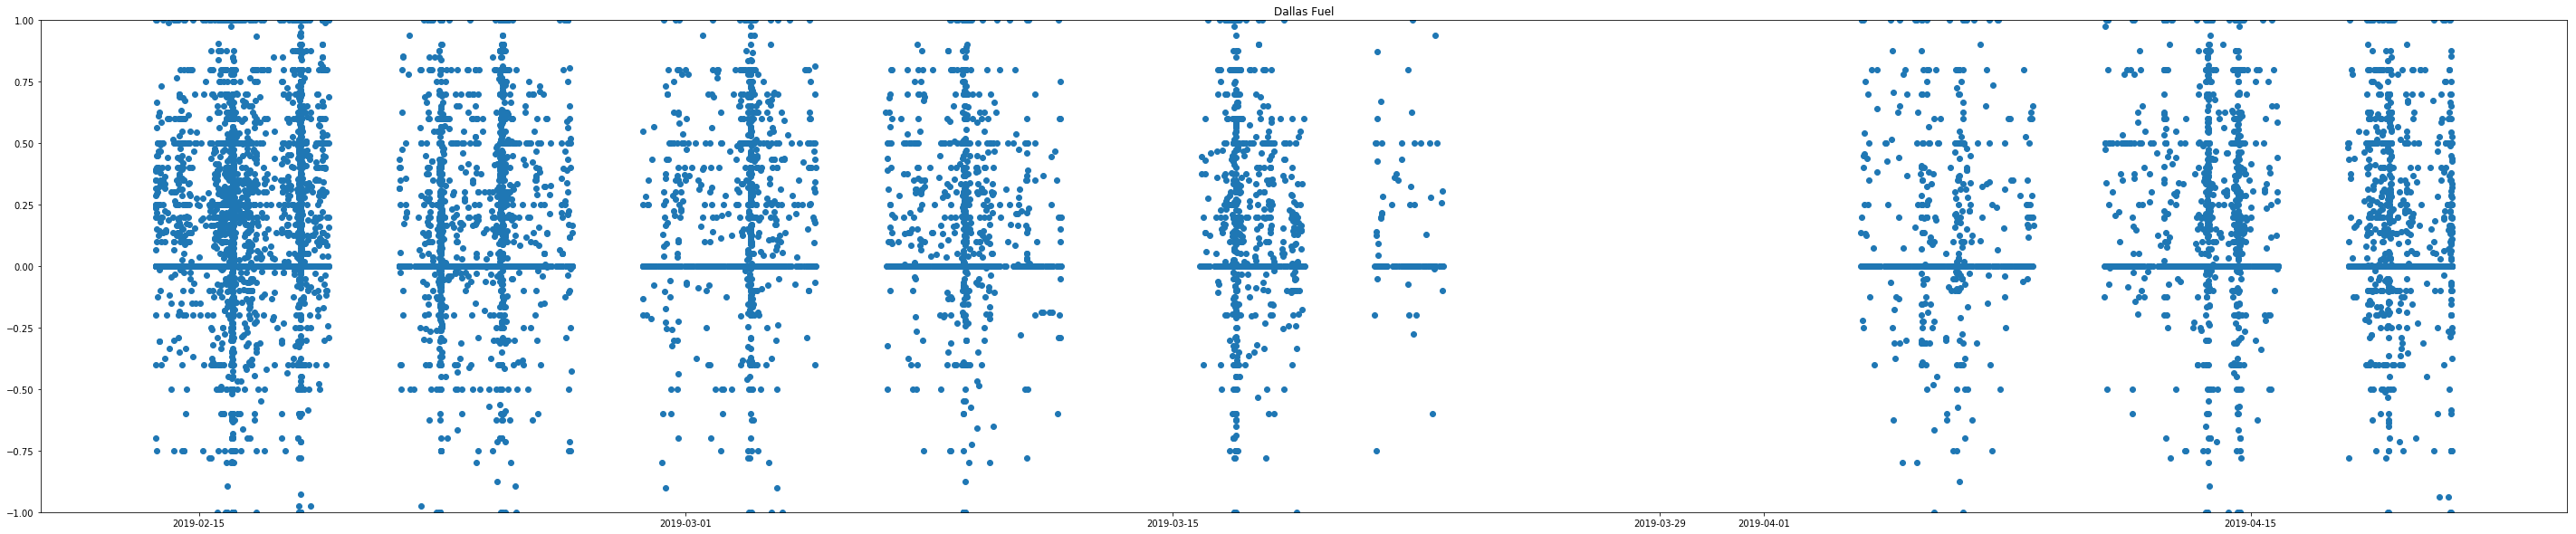

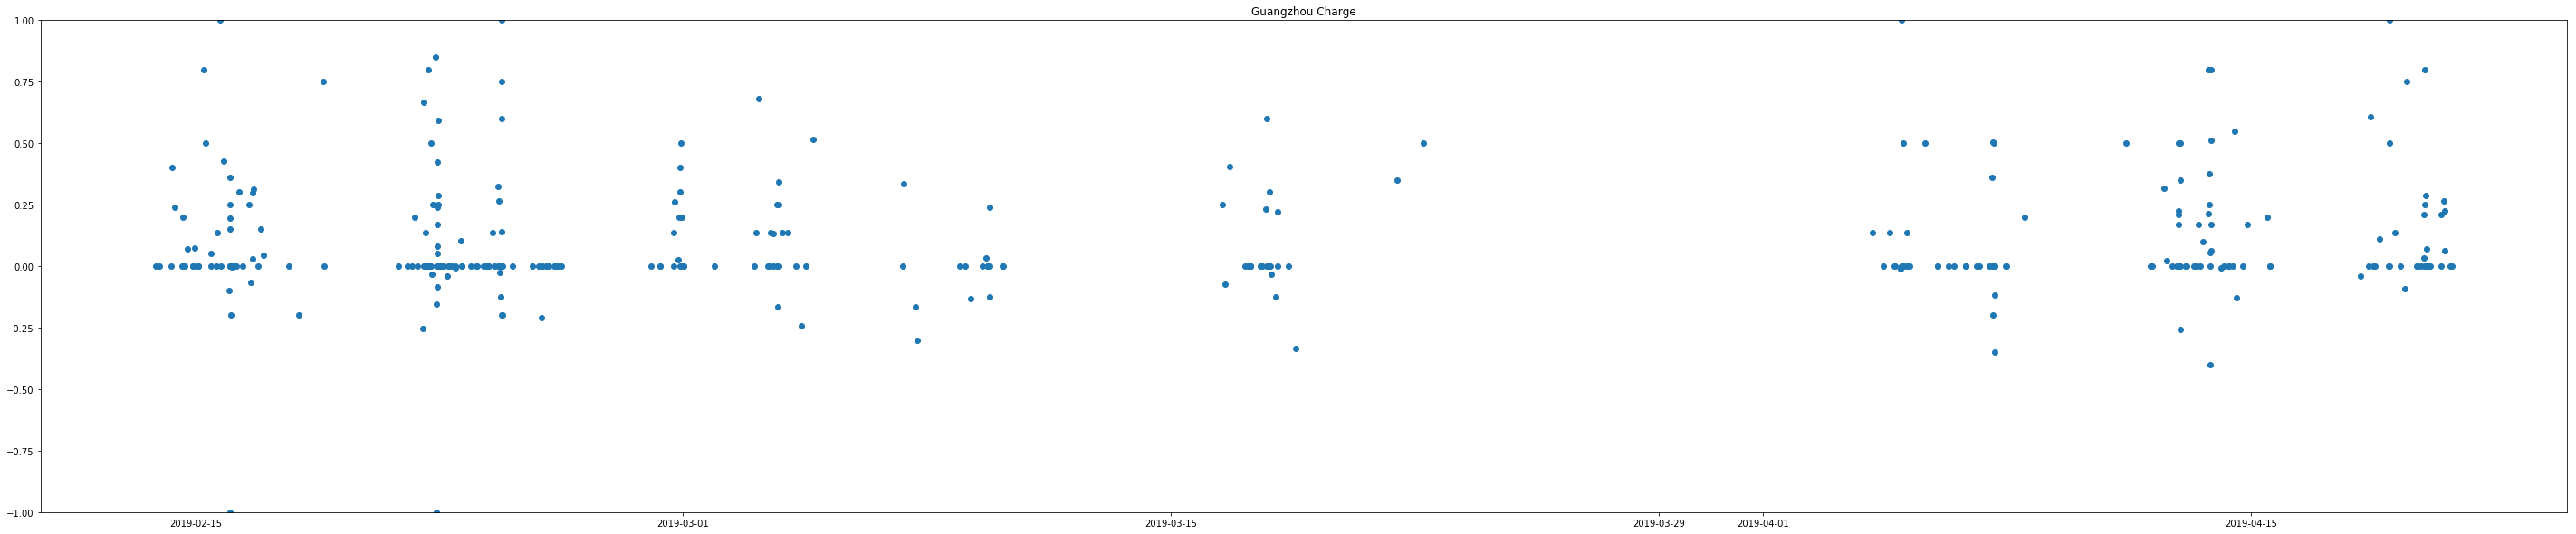

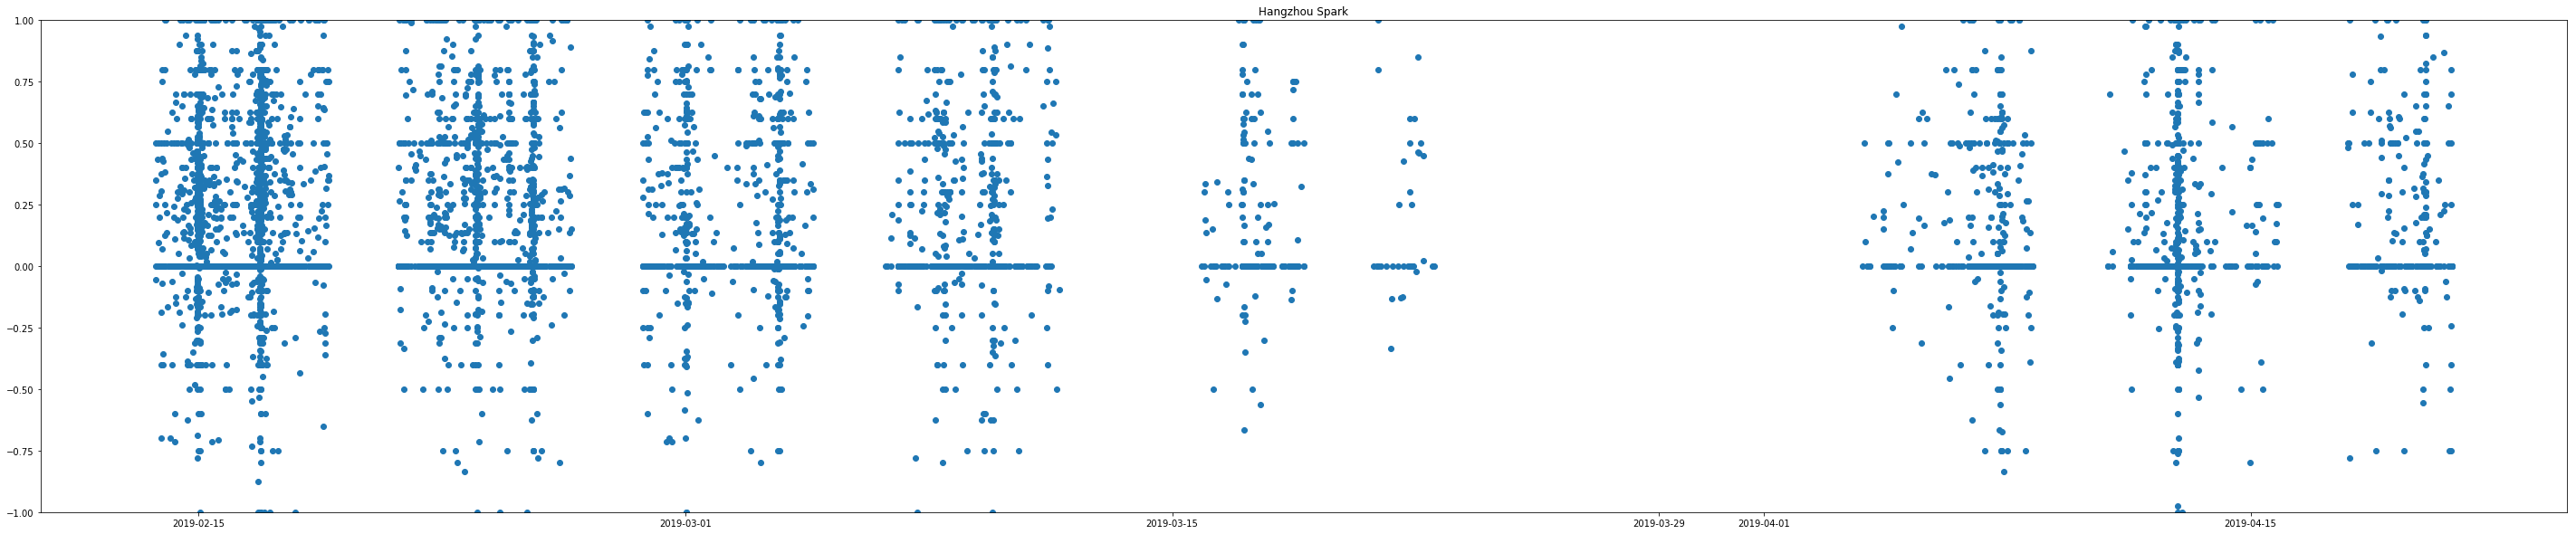

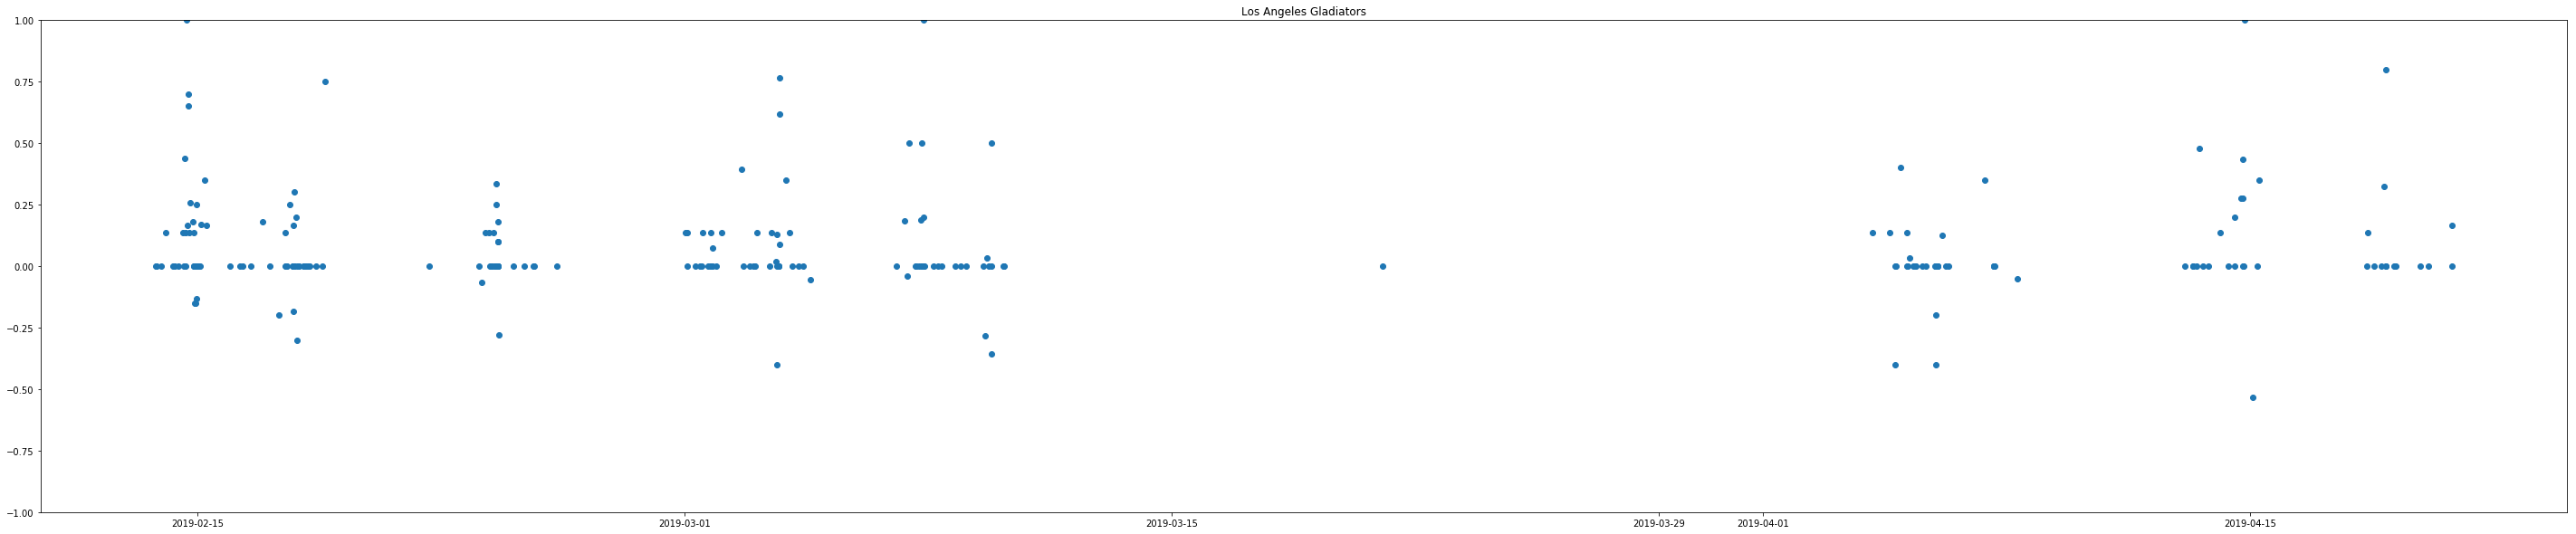

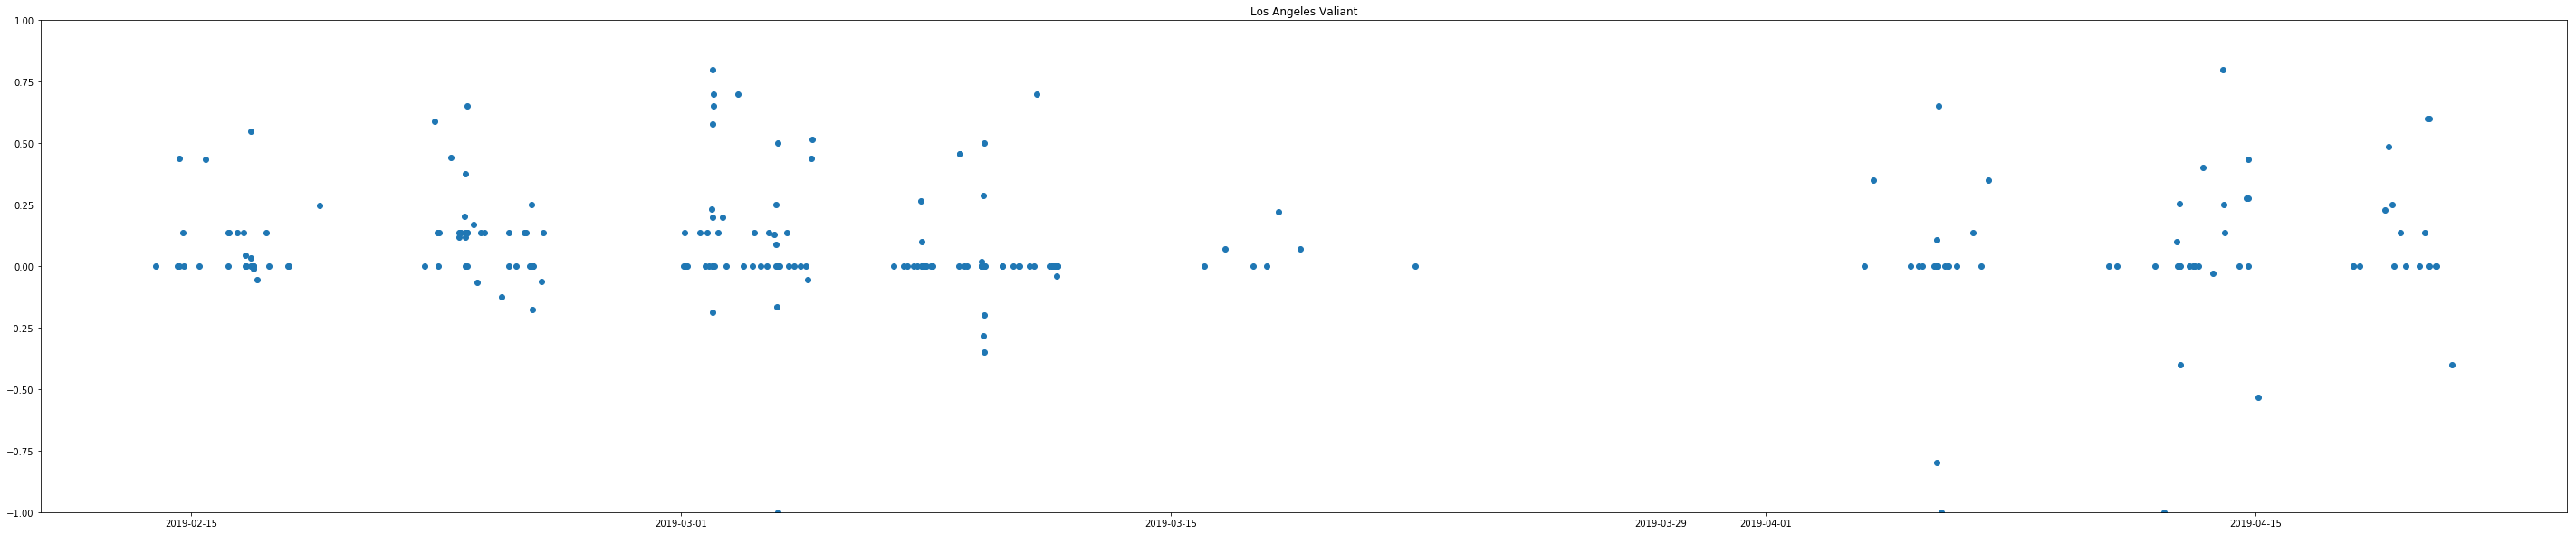

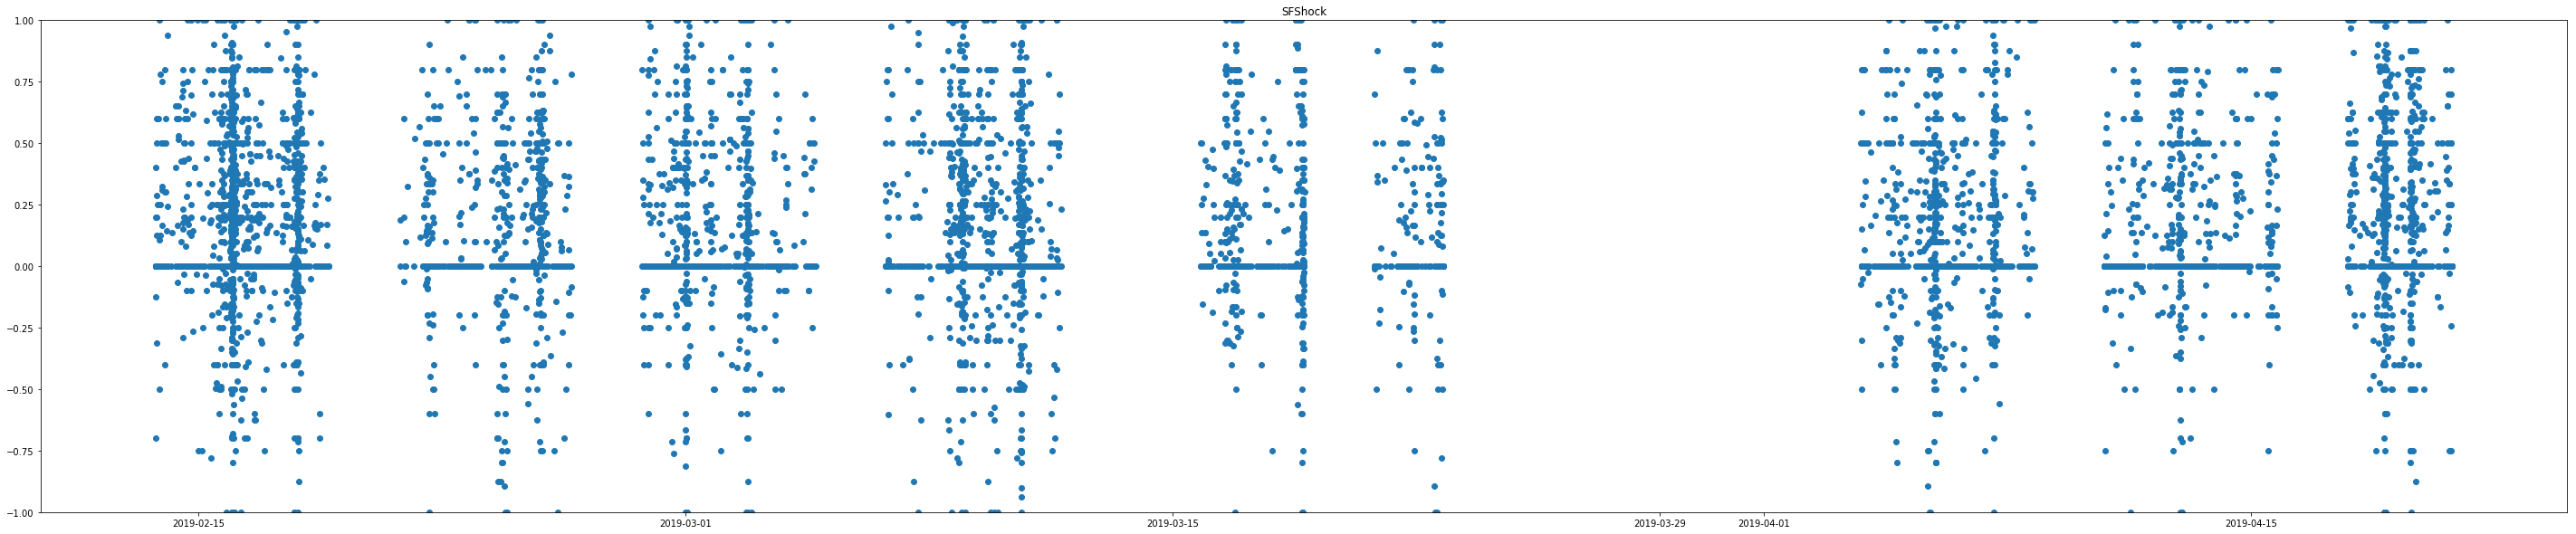

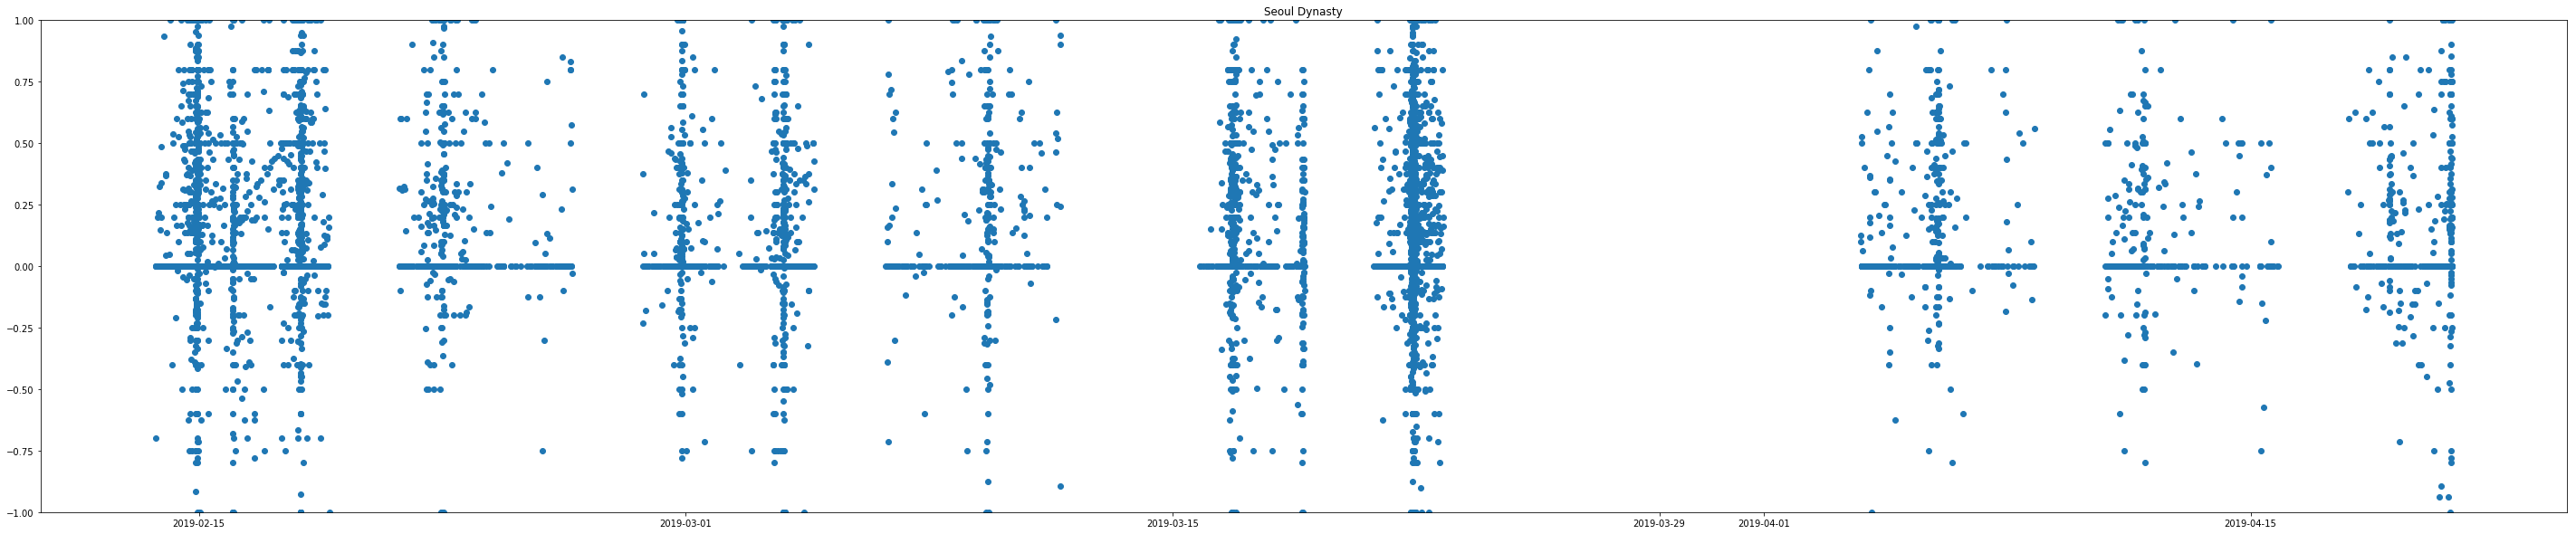

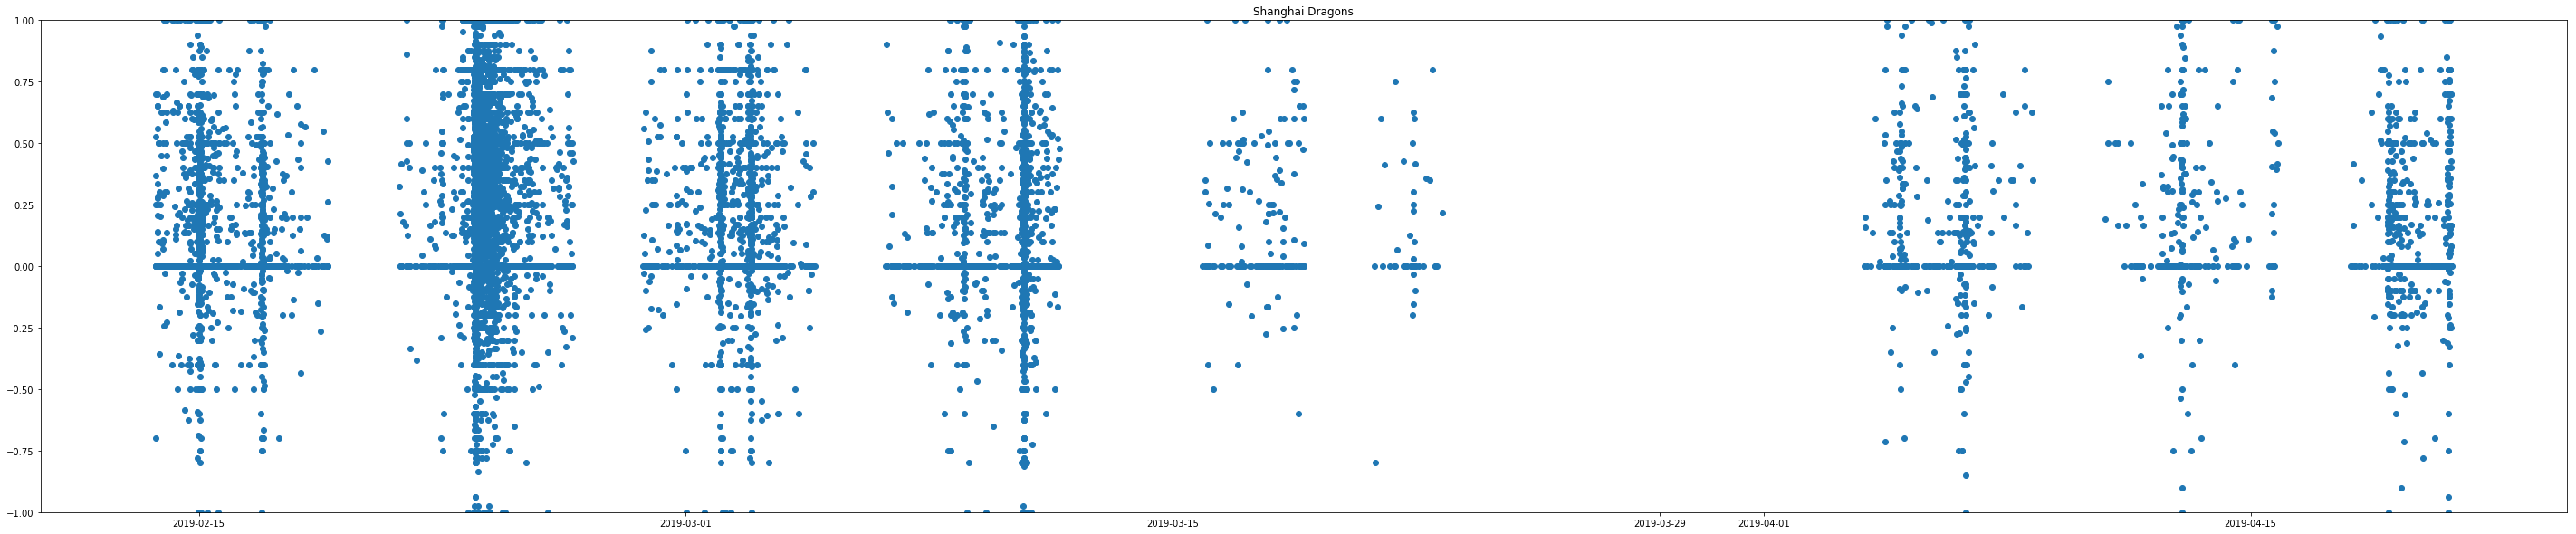

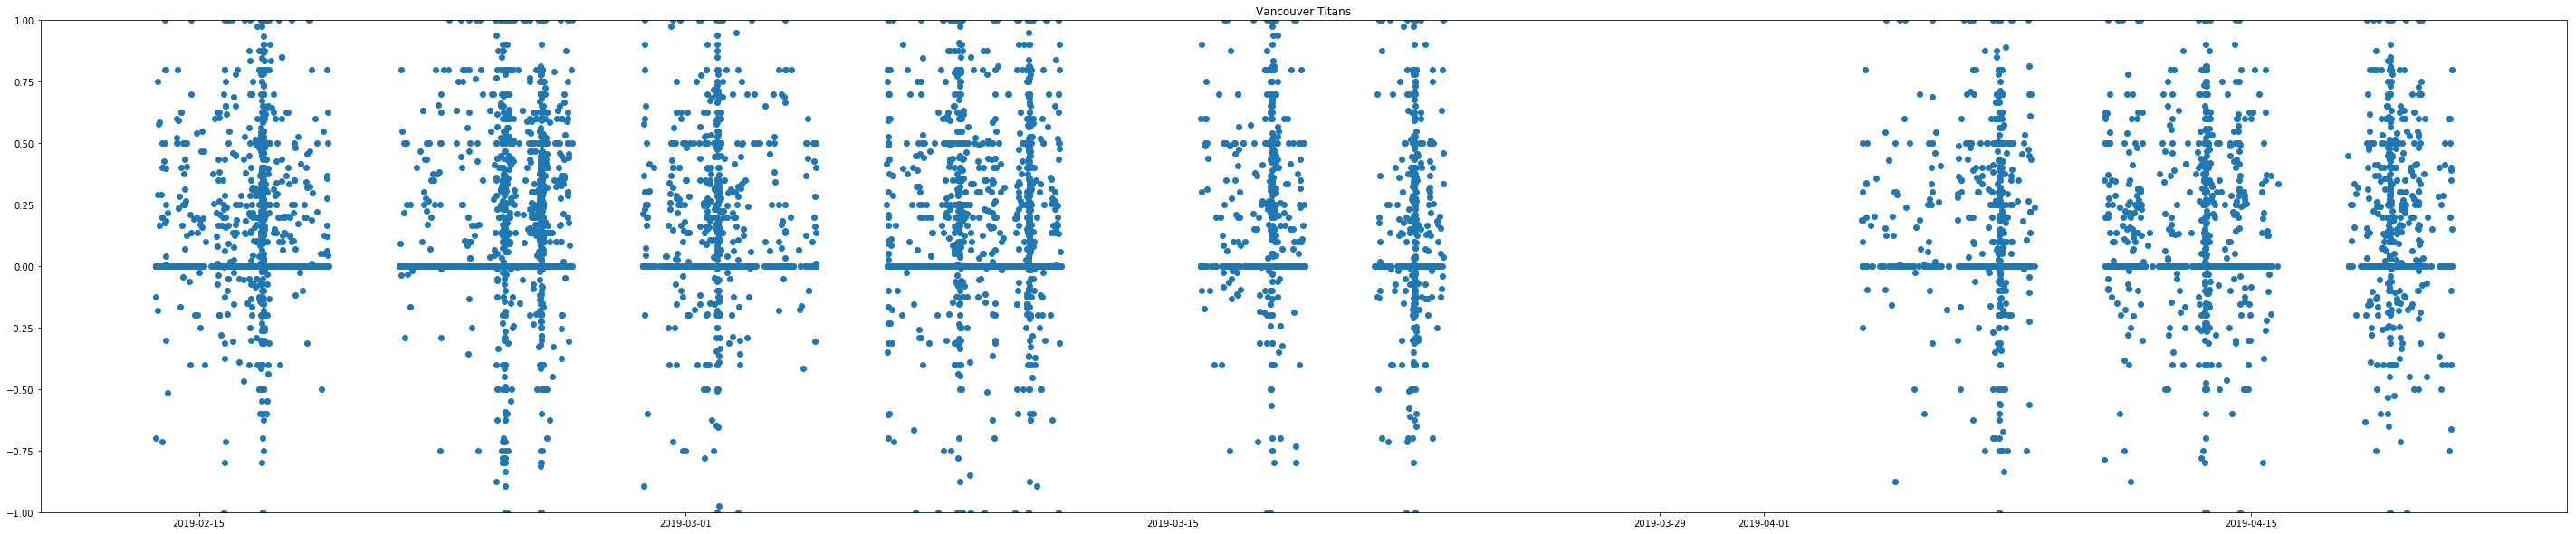

In [28]:
for t_name in env.team_list:
    plot_sentiment(
        team_name=t_name, team_file_paths=env.team_file_paths)